### 0. 사용할 패키지 불러오기

In [1]:
import numpy as np

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout

width = 28
height = 28

Using TensorFlow backend.


### 1. 데이터셋 생성하기

In [2]:
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

### 2. 모델 구성하기

In [3]:
model =Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
__________

### 3. 모델 학습과정 설정하기

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4. 모델 학습시키기

In [5]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data = (x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 13s 269us/step - loss: 0.9468 - acc: 0.6770 - val_loss: 0.1874 - val_acc: 0.9418
Epoch 2/30
50000/50000 [==============================] - 9s 189us/step - loss: 0.2783 - acc: 0.9146 - val_loss: 0.1068 - val_acc: 0.9682
Epoch 3/30
50000/50000 [==============================] - 10s 193us/step - loss: 0.2003 - acc: 0.9386 - val_loss: 0.0836 - val_acc: 0.9754
Epoch 4/30
50000/50000 [==============================] - 9s 186us/step - loss: 0.1626 - acc: 0.9503 - val_loss: 0.0702 - val_acc: 0.9800
Epoch 5/30
50000/50000 [==============================] - 10s 194us/step - loss: 0.1410 - acc: 0.9571 - val_loss: 0.0608 - val_acc: 0.9828
Epoch 6/30
50000/50000 [==============================] - 10s 198us/step - loss: 0.1226 - acc: 0.9626 - val_loss: 0.0563 - val_acc: 0.9833
Epoch 7/30
50000/50000 [==============================] - 10s 194us/step - loss: 0.1149 - acc: 0.9635 - val_loss: 0.05

### 5. 학습과정 살펴보기

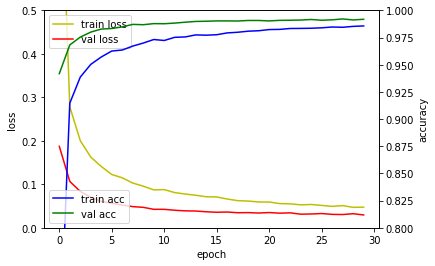

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 모델 평가하기

In [7]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 1s 66us/step
## evaluation loss and metrics ##
[0.022637785915404676, 0.9922]


### 7. 모델 사용하기

In [8]:
yhat_test = model.predict(x_test, batch_size=32)

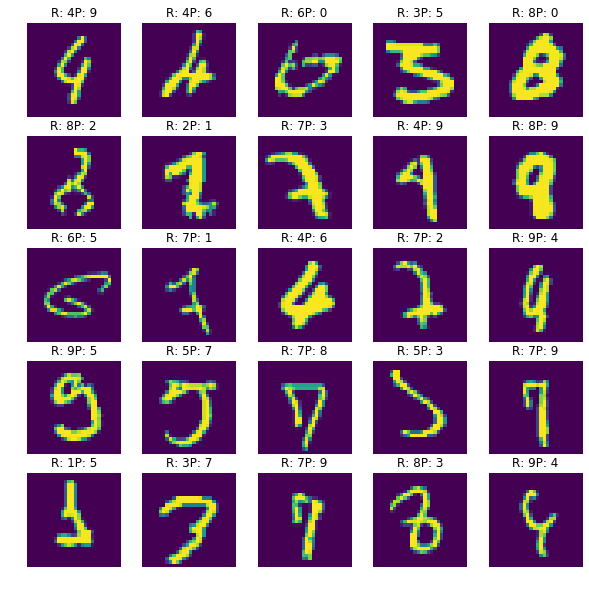

In [9]:
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
        
    sub_plt = axarr[int(cnt/plt_row), int(cnt%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + 'P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)
    
    i += 1
    cnt += 1

plt.show()